# CAP curve

The CAP curve is a tool to graphically assess the quality of the classification algorithm. Actually, just like ROC curve, which is much more popular in modern machine learning. I haven't found any advantages of using CAP curve instead of ROC curve (ROC doesn't have any advantages either). But you can face it if you are dealing with old literature or specific field, so this page may be useful for you.

For more details check:

- [Cumilative accuracy profile](https://en.wikipedia.org/wiki/Cumulative_accuracy_profile) page on wikipedia.
- [Classification Model Performance Evaluation using ROC-AUC and CAP](https://medium.com/geekculture/classification-model-performance-evaluation-using-auc-roc-and-cap-curves-66a1b3fc0480) artical with examples on python.

In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

from sklearn.metrics import accuracy_score, auc

from statsmodels.distributions.empirical_distribution import ECDF

## CAP curve definition

**CAP curve** represents the cumulative number of positive outcomes on the ordinate axis relative to the corresponding cumulative number of the classifying parameter on the abscissa axis.

### Basic understanding of CAP curve by example

**For example**, let some model predict the probabilities $\hat{p}_i$ that $y_i=1$ (the $i$-th client has a positive outcome, manifestation of a trait). Suppose we have 5 observations in the test sample, we have predictions for them and a real class:

| $\hat{p}_i$ | $y_i$ |
| ----------- | ----- |
|     0.2     |   1   |
|     0.6     |   0   |
|     0.8     |   1   |
|     0.7     |   1   |
|     0.4     |   0   |


In order to construct a CAP curve we need to:

1. Sort the observations by decreasing $\hat{p}_i$;

| $\hat{p}_i$ | $y_i$ |
| ----------- | ----- |
|     0.8     |   1   |
|     0.7     |   1   |
|     0.6     |   0   |
|     0.4     |   0   |
|     0.2     |   1   |

2. Number each observation starting from 1;


|$i$| $\hat{p}_i$ | $y_i$ |
|-| ----------- | ----- |
|1|     0.8     |   1   |
|2|     0.7     |   1   |
|3|     0.6     |   0   |
|4|     0.4     |   0   |
|5|     0.2     |   1   |

3. Calculate the cumulative sum $y_i$ ($\hat{S}_{\hat{y}}$);

|$i$| $\hat{p}_i$ | $y_i$ |$\hat{S}_{\hat{y}}$|
|-| ----------- | ----- |---------------------|
|1|     0.8     |   1   |   1                 |
|2|     0.7     |   1   |   2                 |
|3|     0.6     |   0   |   2                 |
|4|     0.4     |   0   |   2                 |
|5|     0.2     |   1   |   3                 |

Starting at point (0,0) and continuing with the variables $i$ and $\hat{S}_{\hat{y}}$, a CAP curve is plotted.

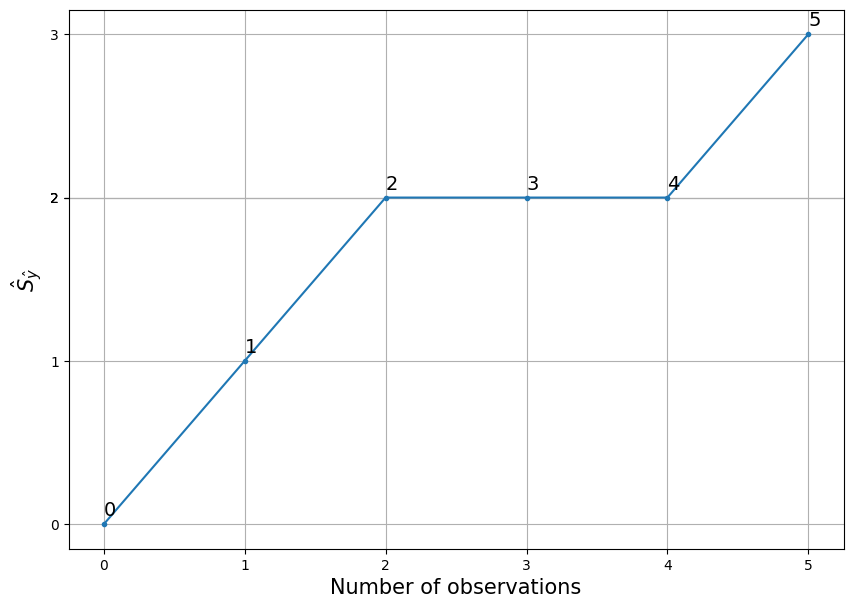

In [4]:
plt.figure(figsize = [10,7])

x = list(range(6))
y = [0,1,2,2,2,3]

plt.plot(x, y, marker = ".")

plt.xlabel("Number of observations", fontsize = 15)
plt.ylabel("$\\hat{S}_{\\hat{y}}$", fontsize = 15)

for x_val, y_val in zip(x, y):
    plt.text(x_val, y_val + 0.05, str(x_val), fontsize = 14)

plt.yticks(y)
plt.grid()

Interpretation for $i$-th point is: in $i$ worthest, according to the model, the observations are $\hat{S}_{\hat{y}_i}$ manifestations of the trait. Or for each point from the example:

1. In the 1 worst, according to the model, observations lie 1 manifestations of the trait;
1. In the 2 worst observations, according to the model, there are 2 manifestations of the trait;
1. In the 3 worst, according to the model, observations lie 2 manifestations of the trait;
1. In the 4 worst, according to the model, observations lie 2 manifestations of the trait;
1. In the 5 worst, according to the model, observations lie 3 manifestations of the trait.

### Relative CAP curve

If on the abscissa axis we plot not the number of observations $i$ but $i/n$ (where $n$ is the number of observations on which the CUP curve is calculated) and on the ordinate axis we plot not the cumulative sum but the cumulative percentage (the value coinciding with $TPR$, [detail](#TPR_CAP)), then we get what I call a *relative CAP* curve, the same in shape but bounded in the unit square:
<a id="last_tab_example"></a>

|$i$| $\hat{p}_i$  | $y_i$ |$\hat{S}_{\hat{y}}$|$i/n$|$TPR_i$|
|---| ------------ | ------- |---------------------|-------|---------|
| 1 |     0.8      |    1    |        1            |  0.2  |   1/3   |
| 2 |     0.7      |    1    |        2            |  0.4  |   2/3   |
| 3 |     0.6      |    0    |        2            |  0.6  |   2/3   |
| 4 |     0.4      |    0    |        2            |  0.8  |   2/3   |
| 5 |     0.2      |    1    |        3            |   1   |    1    |

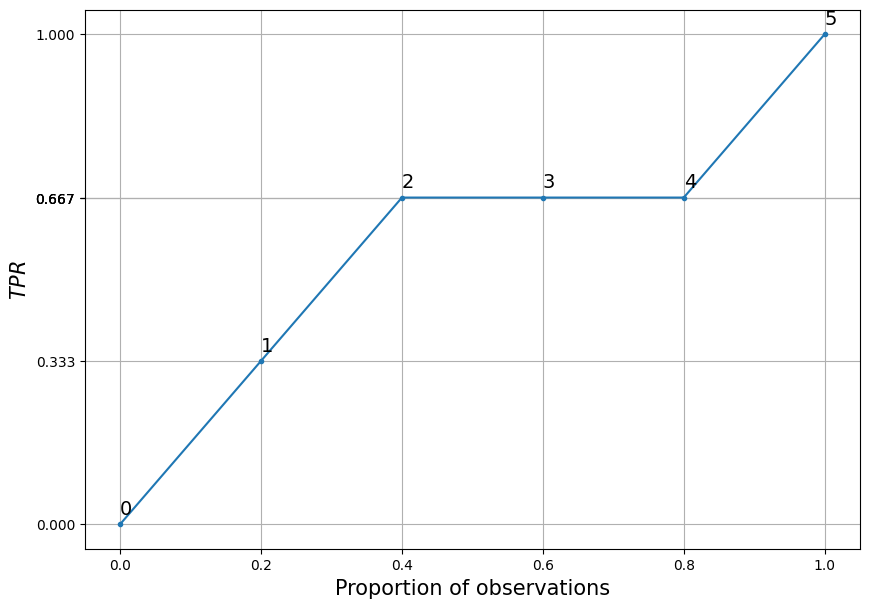

In [11]:
plt.figure(figsize = [10,7])

y_rel = [0, 1/3, 2/3, 2/3, 2/3, 1]
x_rel = [i/5 for i in range(6)]

plt.plot(
    x_rel, y_rel, marker = "."
)

plt.xlabel("Proportion of observations", fontsize = 15)

plt.ylabel("$TPR$", fontsize = 15)

for i, (x_val, y_val) in enumerate(zip(x_rel, y_rel)):
    plt.text(x_val, y_val + 0.02, str(i), fontsize = 14)
    
plt.yticks(y_rel)
plt.grid()

The interpretation of the $i$th point would be as follows: in $i/n*100\\%$ of the worst observations, according to the model, there are $TPR_i*100\%$ manifestations of the trait. Or for each point in the example under consideration:

1. The 0% worst observations, according to the model, contain 0% of the manifestations of the trait;
1. In 20% of the worst observations, according to the model, lies 33% of the manifestations of the trait;
1. In the 40% worst observations, according to the model, lies 67% of the manifestations of the trait;
1. In the 60% worst observations, according to the model, lies 67% of the manifestations of the trait;
1. In the 80% worst observations, according to the model, lies 67% of the manifestations of the trait;
1. In the 100% worst observations, according to the model, lies 100% of the manifestations of the trait.

**Further, by default, the relative CAP curve will be discussed, because I find it more applicable.**

<a id="2"></a>

## Ideal CAP curve

Plays an important role in understanding the CAP curve.

### Description

An ideal classifier has the following property - it can make such a discriminant variable $p_i$ from an input combination of observation descriptor variables $X_i$ such that:

$$y_i=1,y_j=0 \Rightarrow p_i>p_j; \forall i,j; i\neq j$$

That is, for any two observations ($i$-th and $j$-th), if one has a manifestation of the trait and the other does not, the prediction for the former should be greater.

In such conditions, after sorting by descending order, all observations with the manifestation of the trait will be higher than all observations without the manifestation of the trait. Consequently, the CAP curve will grow only at the beginning, while only observations with the manifestation of the trait are going on. So until it reaches 1 - at the point corresponding to the lowest prediction for the observation with the manifestation of the trait. Then it will be unchanged for all observations without the trait.

### Demonstration by example

Going back to the example from the last section, [last table considered](#last_tab_example), in the case of a perfect classifier would have to be sorted as follows:

|$i$| $\hat{p}_i$  | $y_i$ |$\hat{S}_{\hat{y}}$|$i/n$|$TPR$|
|---| ------------ | ------- |---------------------|-------|-------|
| 1 |     0.8      |    1    |        1            |  0.2  |  1/3  |
| 2 |     0.7      |    1    |        2            |  0.4  |  2/3  |
| 3 |     0.2      |    1    |        2            |  0.6  |   1   |
| 4 |     0.6      |    0    |        2            |  0.8  |   1   |
| 5 |     0.4      |    0    |        3            |   1   |   1   |

All observations with $y_i=1$ is higher than observations with $y_i=0$.

Let's add a perfect CAP curve to the past graph.

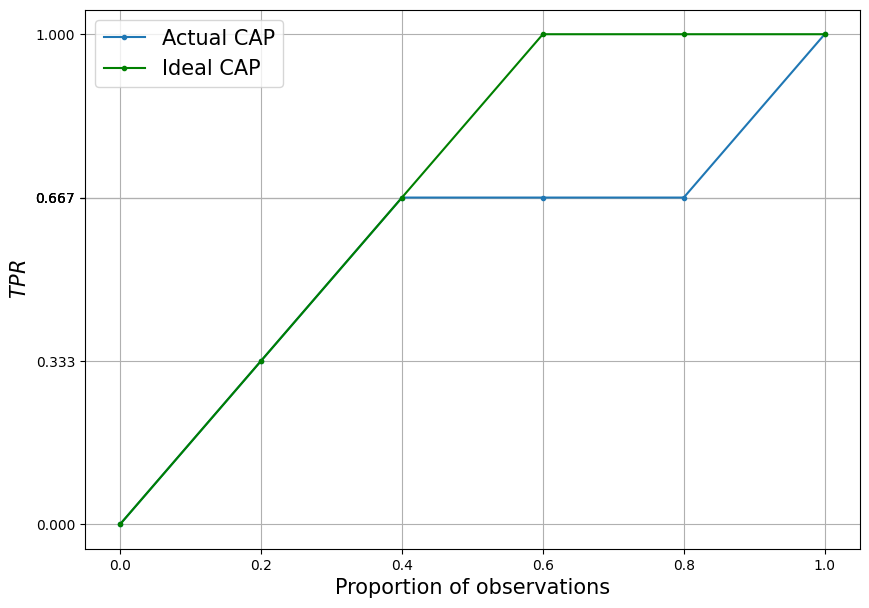

In [5]:
plt.figure(figsize = [10,7])

y_rel = [0, 1/3, 2/3, 2/3, 2/3, 1]
y_rel_ideal = [0, 1/3, 2/3, 1, 1, 1]
x_rel = [i/5 for i in range(6)]

plt.plot(x_rel, y_rel, marker = ".")
plt.plot(x_rel, y_rel_ideal, marker = ".", color = "green")

plt.xlabel("Proportion of observations", fontsize = 15)
plt.ylabel("$TPR$", fontsize = 15)

plt.legend(
    ["Actual CAP", "Ideal CAP"],
    fontsize = 15
)

plt.yticks(y_rel)
plt.grid()

<a id="3"></a>

## Random CAP curve

Together with the ideal is used to understand how good or bad this or that model is.

### Description

From the reasoning proposed above, it is clear that the faster the CUP curve grows at the beginning, the better the classifier to be censored. It is clear that a random classifier will form a CAP that grows uniformly over any area of the fraction of observations considered. Therefore, in the case of the general population, it will simply be a straight line extending from point (0,0) to point (1,1). In the case of a sample, it will be a curve with very close (or, in some cases, overlapping) characteristics.

### Computational experiment

Consider a computational experiment: let's simulate a random classifier and post a CAP for it.

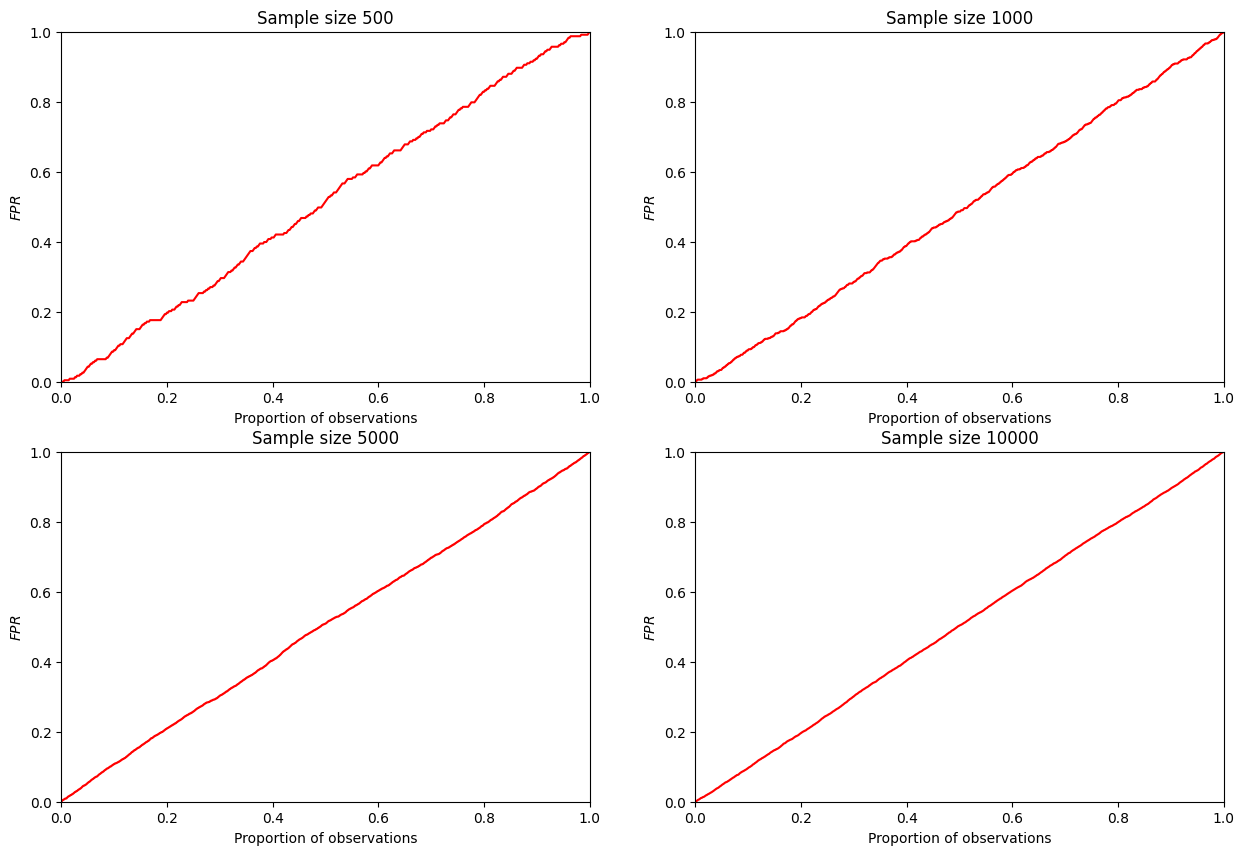

In [7]:
def plot_random_CAP(sample_size):
    experimental_sample = pd.DataFrame({
        "p_hat" : np.random.rand(sample_size),
        "y" : np.random.choice([0,1], sample_size)
    })

    experimental_sample.sort_values(
        "p_hat", ascending = False,
        inplace = True
    )

    experimental_sample["$$\\hat{F}_{\\hat{y}}$$"] = ECDF(
        1 - experimental_sample.query("y == 1")["p_hat"]
    )(1 - experimental_sample["p_hat"])
    experimental_sample.head()

    experimental_sample["$i$"] = range(1, sample_size + 1)
    experimental_sample["$i/n$"] = experimental_sample["$i$"]/sample_size

    plt.plot(
        experimental_sample["$i/n$"], 
        experimental_sample["$$\\hat{F}_{\\hat{y}}$$"],
        color = "red"
    )
    plt.xlim([0,1])
    plt.ylim([0,1])
    plt.xlabel("Proportion of observations")
    plt.ylabel("$FPR$")
    
    
sample_sizes = [500, 1000, 5000, 10000]
plt.figure(figsize = [15, 10])
for i in range(4):
    plt.subplot(2, 2, i+1)
    plt.title("Sample size " + str(sample_sizes[i]))
    plot_random_CAP(sample_sizes[i])

It can be seen that such a curve really tends to a diagonal straight line with increasing sample size. Therefore, in applied research, it is assumed to be equal to a diagonal line.

### Adding to the example of the previous section

Then the full CAP graph, for the example considered, will take the form:

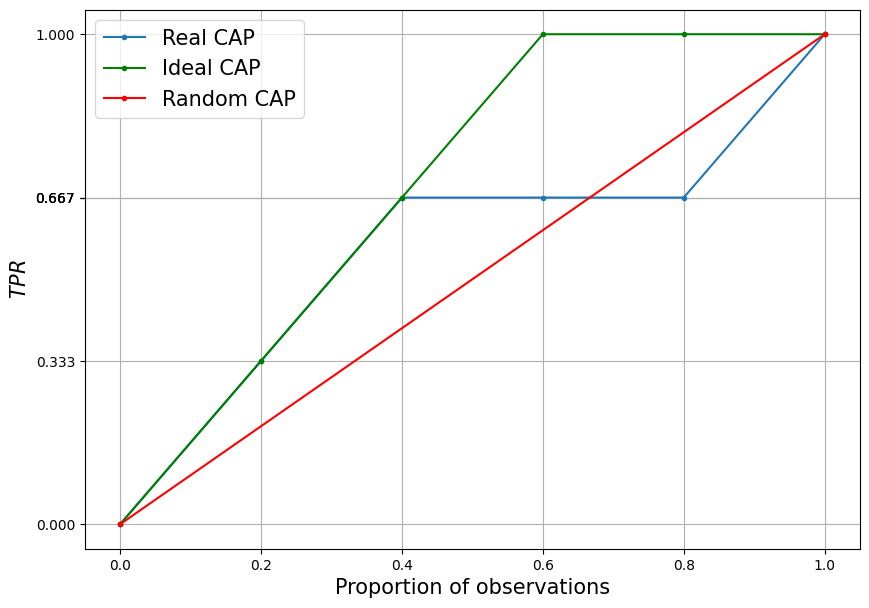

In [8]:
plt.figure(figsize = [10,7])

y_rel = [0, 1/3, 2/3, 2/3, 2/3, 1]
y_rel_ideal = [0, 1/3, 2/3, 1, 1, 1]
x_rel = [i/5 for i in range(6)]

plt.plot(x_rel, y_rel, marker = ".")
plt.plot(
    x_rel, y_rel_ideal, 
    marker = ".", color = "green"
)
plt.plot(
    [0,1], [0,1],
    color = "red", marker = "."
)

plt.xlabel("Proportion of observations", fontsize = 15)
plt.ylabel("$TPR$", fontsize = 15)

plt.legend(
    [
        "Real CAP", 
        "Ideal CAP",
        "Random CAP"
    ],
    fontsize = 15
)

plt.yticks(y_rel)
plt.grid()

<a id="TPR_CAP"></a>

## $TPR$ on the ordinate axis of CAP

$TPR$ is the proportion of correctly predicted observations of trait manifestations at the treshold $p'$:

$$TPR_i(p')=\sum_{i=1}^n\frac{I(\hat{p}_i \geq p')}{n};$$

$$I(\hat{p}_i \geq p')=\begin{cases}
    1, \hat{p}_i \geq p';\\
    0, \text{in other case}.
\end{cases}$$

This value will be on the ordinate axis of the CAP curve.

### Checking by example

Quite a tentative verification, but still, let's calculate $TPR$ as we did for the CAP curve and get it using `sklearn.metrics.roc_curve` and compare.

In [10]:
from sklearn.metrics import roc_curve

np.random.seed(10)

sample_size = 200


test_df = pd.DataFrame({
    "p_hat" : np.random.rand(sample_size),
    "y" : np.random.choice([0,1], sample_size)
})

CAT_TPR = np.concatenate([
    [0],
    np.sort(
        ECDF(1 - test_df.query('y == 1')["p_hat"])\
        (1 - test_df["p_hat"])
    )
])

fpr, tpr, t = roc_curve(
    test_df["y"],
    test_df["p_hat"],
    drop_intermediate = False
)

# comparing with 4-digits precision
all(np.round(CAT_TPR,4) == np.round(tpr,4))

True

All fine - values are the same.